<a href="https://colab.research.google.com/github/mposa/MEAM517/blob/master/Lecture16/simulate_slip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

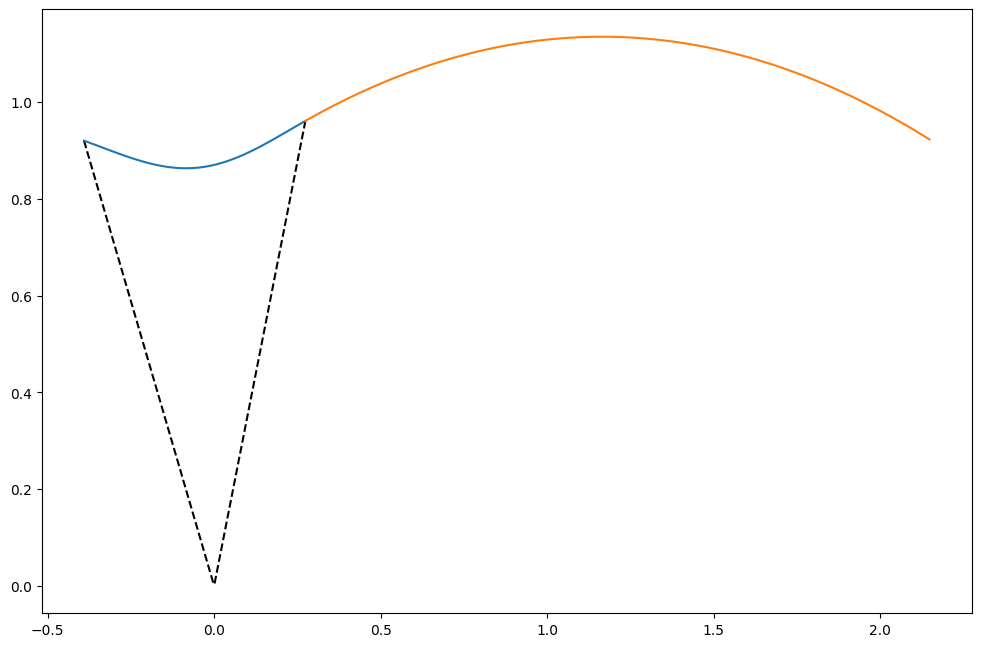

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

theta = 23/180*math.pi

g = 9.81
g_vec = np.array([0, -g]);
m = 80;
k = 30e3;
L0 = 1;
h = 1
v = 5
E = m*g*h + .5*m*v**2

z_impact = L0*math.cos(theta);
x_impact = -L0*math.sin(theta);

#z0 = np.linspace(.95,1.75,10);
z0 = np.array([1])

def takeoff_event(t,x):
  return x[0]**2 + x[1]**2 - L0**2
takeoff_event.terminal = True
takeoff_event.direction = 1


def stance_dynamics(t,x):
  L = np.linalg.norm(x[:2])
  return np.concatenate((x[2:], k/m*(L0-L)*x[:2]/L + g_vec))

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
for i in range(len(z0)):
  # flight phase
  xdot_flight = math.sqrt((E - m*g*z0[i])*2/m);
  zdot_impact = -math.sqrt((m*g*z0[i] - m*g*z_impact)*2/m);
  x0 = np.array([x_impact, z_impact, xdot_flight, zdot_impact])

  # stance phase
  sol = solve_ivp(stance_dynamics, [0, 3], x0, t_eval = np.linspace(0,3,1000), events=takeoff_event)
  plt.plot([sol.y[0, 0], 0], [sol.y[1, 0], 0], 'k--')
  plt.plot([sol.y[0, -1], 0], [sol.y[1, -1], 0], 'k--')
  plt.plot(sol.y[0,:], sol.y[1,:])

    
  t_flight = np.linspace(0,3,1000);
  x_flight = sol.y[0, -1] + t_flight*sol.y[2, -1];
  z_flight = sol.y[1, -1] + t_flight*sol.y[3, -1] - .5*g*t_flight**2;

  i_impact = np.argmax(z_flight < z_impact)

  x_flight = x_flight[:i_impact]
  z_flight = z_flight[:i_impact]
  
  plt.plot(x_flight,z_flight)